In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from data_clean2 import clean_data
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn import preprocessing
from feature_selection import y_classify_five, y_classify
# Load up dataset 1: gsmarena
data = pd.read_csv('dataset/GSMArena_dataset_2020.csv', index_col=0)

data_features = data[["oem", "launch_announced", "launch_status", "body_dimensions", "display_size", "comms_wlan", "comms_usb",
                "features_sensors", "platform_os", "platform_cpu", "platform_gpu", "memory_internal",
                "main_camera_single", "main_camera_video", "misc_price",
                "selfie_camera_video",
                "selfie_camera_single", "battery"]]

# Clean up the data into a trainable form.
df = clean_data(data_features)

df.dropna(inplace=True)
df.reset_index(drop=True)

y = df["misc_price"]
X = df.drop(["key_index", "misc_price"], axis=1)

print('df = \n',df)
# convert to categorical data
lab_enc = preprocessing.LabelEncoder()
print('lab_enc = \n',lab_enc)
# y = lab_enc.fit_transform(y)
#old_y = y
y = y.apply(y_classify)#e.g. y > 700: return 2; 700 >= y >= 300: return 1; y < 300: return 0
#y_five = old_y.apply(y_classify_five)

# Split data into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
# X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y_five, test_size=.3, random_state=0)



clf = BernoulliNB()
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('\n- - - BernoulliNB')
print(classification_report(y_test, y_pred))
print('0: price < 300, 1:700 >= price >= 300, 2: price > 700')
print('precise accuracy = ',accuracy_score(y_pred, y_test))

# clf = BernoulliNB()
# model = clf.fit(X_train_, y_train_)
# y_pred = clf.predict(X_test_)
# print('\n- - - BernoulliNB')
# print(classification_report(y_test_, y_pred))
# print('0: price < 200, 1: 450 >= price >= 200, 2: 700 >= price >= 450, 3: 700 >= price >= 1000, 4: price > 1000')
# print('precise accuracy = ',accuracy_score(y_pred, y_test_))

clf = GaussianNB()
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('\n- - - GaussianNB')
print(classification_report(y_test, y_pred))
print('0: price < 300, 1:700 >= price >= 300, 2: price > 700')
print('precise accuracy = ',accuracy_score(y_pred, y_test))

# clf = GaussianNB()
# model = clf.fit(X_train_, y_train_)
# y_pred = clf.predict(X_test_)
# print('\n- - - GaussianNB')
# print(classification_report(y_test_, y_pred))
# print('0: price < 200, 1: 450 >= price >= 200, 2: 700 >= price >= 450, 3: 700 >= price >= 1000, 4: price > 1000')
# print('precise accuracy = ',accuracy_score(y_pred, y_test_))

clf = MultinomialNB()
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('\n- - - MultinomialNB')
print(classification_report(y_test, y_pred))
print('0: price < 300, 1:700 >= price >= 300, 2: price > 700')
print('precise accuracy = ',accuracy_score(y_pred, y_test))

# clf = MultinomialNB()
# model = clf.fit(X_train_, y_train_)
# y_pred = clf.predict(X_test_)
# print('\n- - - MultinomialNB')
# print(classification_report(y_test_, y_pred))
# print('0: price < 200, 1: 450 >= price >= 200, 2: 700 >= price >= 450, 3: 700 >= price >= 1000, 4: price > 1000')
# print('precise accuracy = ',accuracy_score(y_pred, y_test_))

clf = ComplementNB()
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('\n- - - ComplementNB')
print(classification_report(y_test, y_pred))
print('0: price < 300, 1:700 >= price >= 300, 2: price > 700')
print('precise accuracy = ',accuracy_score(y_pred, y_test))

# clf = ComplementNB()
# model = clf.fit(X_train_, y_train_)
# y_pred = clf.predict(X_test_)
# print('\n- - - ComplementNB')
# print(classification_report(y_test_, y_pred))
# print('0: price < 200, 1: 450 >= price >= 200, 2: 700 >= price >= 450, 3: 700 >= price >= 1000, 4: price > 1000')
# print('precise accuracy = ',accuracy_score(y_pred, y_test_))


#plot data from Bayes




c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (67,68,72,77,79,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\AppData\Local\Programs\Python\Python37-32\Scripts\notebook\9417project\data_clean2.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = s.str.extract(r"(\d+)")
C:\Users\user\AppData\Local\Programs\Python\Python37-32\Scripts\notebook\9417project\data_clean2.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

df = 
       key_index    oem  launch_announced  body_dimensions  features_sensors  \
0             5   32.0            2019.0     98777.531250               5.0   
1             6   32.0            2019.0     82987.937500               5.0   
2            17   34.0            2020.0    118770.500000               5.0   
3            18   34.0            2020.0    109760.671875               5.0   
4            19   34.0            2020.0    110202.843750               5.0   
...         ...    ...               ...              ...               ...   
1030      10482  115.0            2016.0     80056.953125               5.0   
1031      10486  115.0            2016.0    100725.750000               5.0   
1032      10511  115.0            2015.0     68500.796875               5.0   
1033      10563  115.0            2014.0    126206.453125               4.0   
1034      10635  115.0            2011.0     85960.000000               3.0   

      platform_gpu  main_camera_single  main

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (67,68,72,77,79,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\AppData\Local\Programs\Python\Python37-32\Scripts\notebook\9417project\data_clean2.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = s.str.extract(r"(\d+)")
C:\Users\user\AppData\Local\Programs\Python\Python37-32\Scripts\notebook\9417project\data_clean2.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

df = 
       key_index    oem  launch_announced  body_dimensions  features_sensors  \
0             5   32.0            2019.0     98777.531250               5.0   
1             6   32.0            2019.0     82987.937500               5.0   
2            17   34.0            2020.0    118770.500000               5.0   
3            18   34.0            2020.0    109760.671875               5.0   
4            19   34.0            2020.0    110202.843750               5.0   
...         ...    ...               ...              ...               ...   
1030      10482  115.0            2016.0     80056.953125               5.0   
1031      10486  115.0            2016.0    100725.750000               5.0   
1032      10511  115.0            2015.0     68500.796875               5.0   
1033      10563  115.0            2014.0    126206.453125               4.0   
1034      10635  115.0            2011.0     85960.000000               3.0   

      platform_gpu  main_camera_single  main

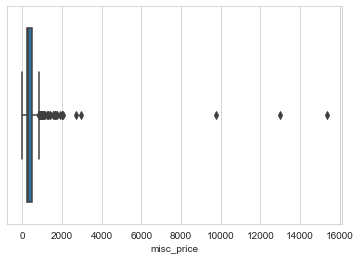

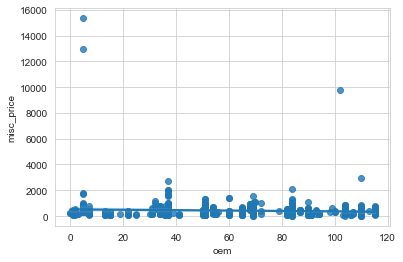

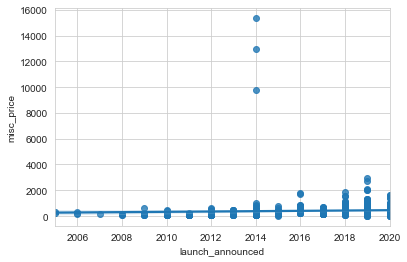

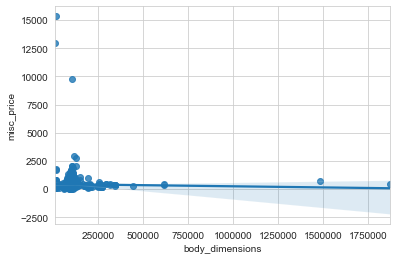

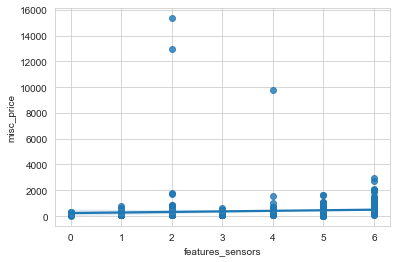

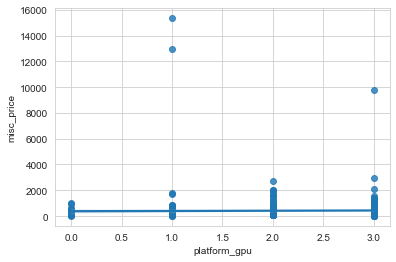

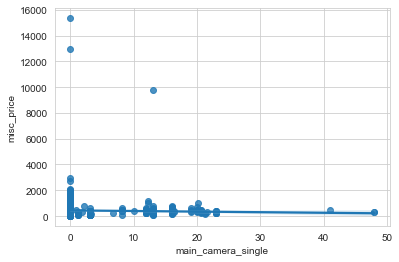

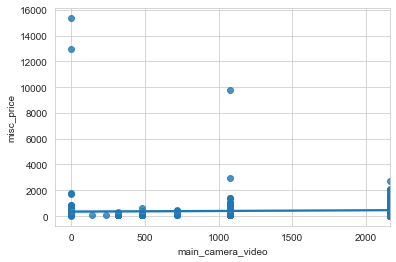

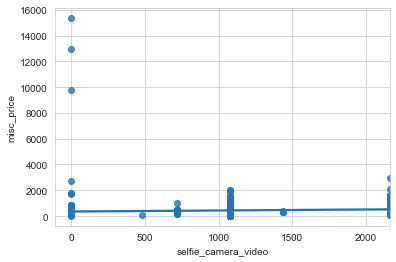

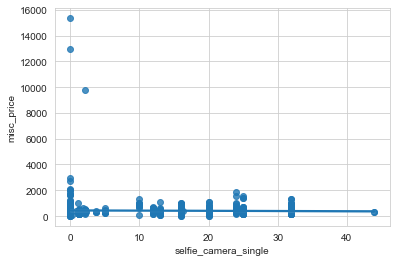

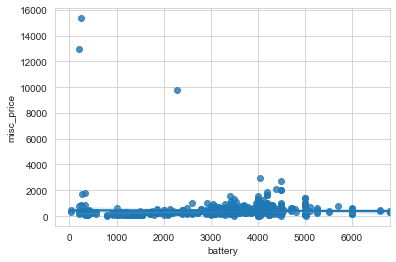

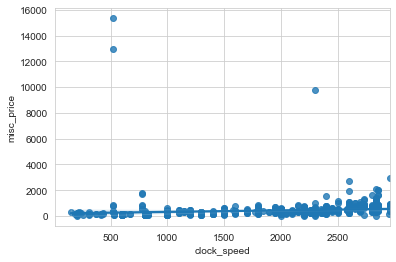

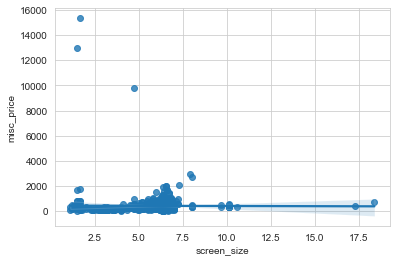

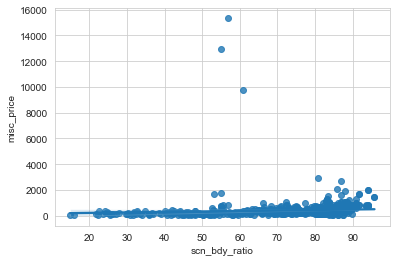

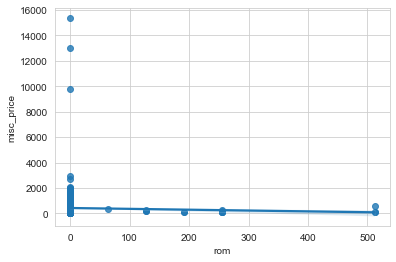

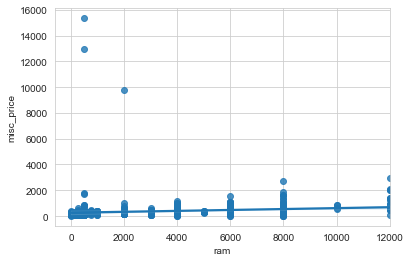

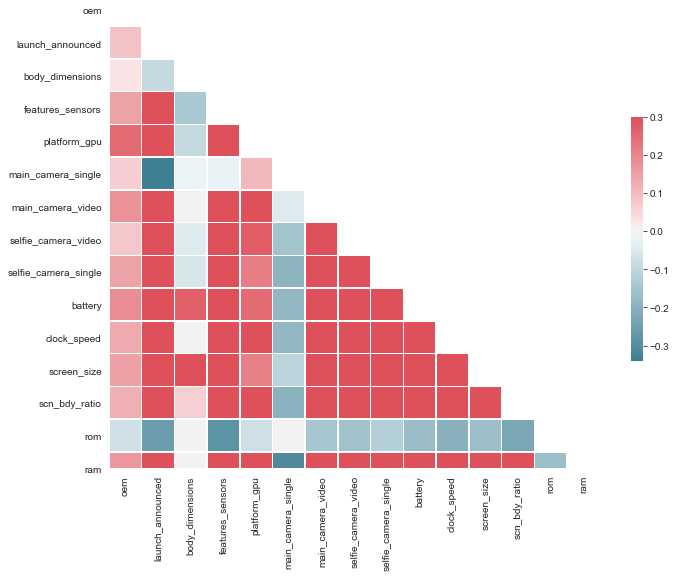

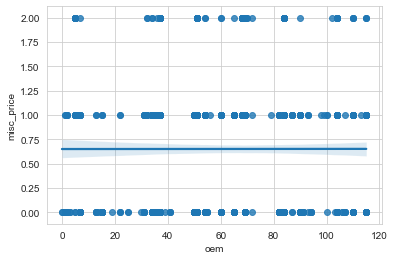

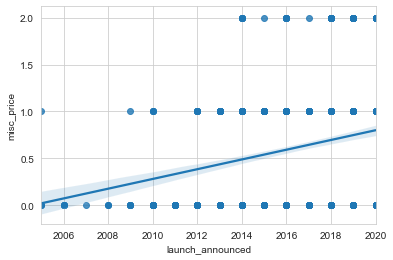

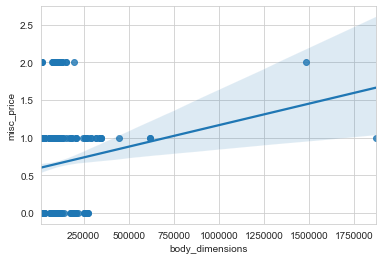

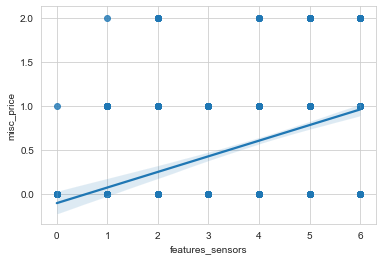

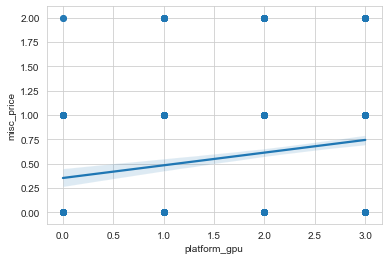

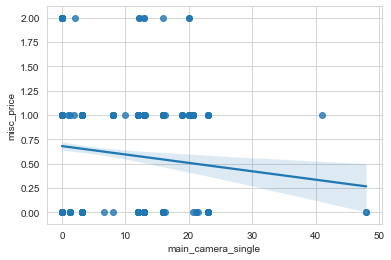

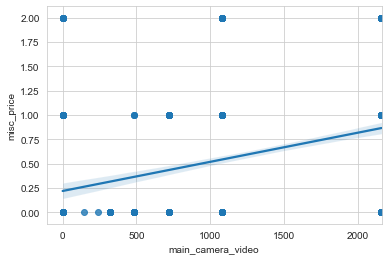

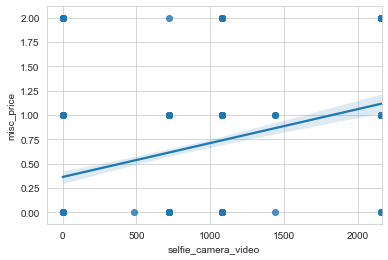

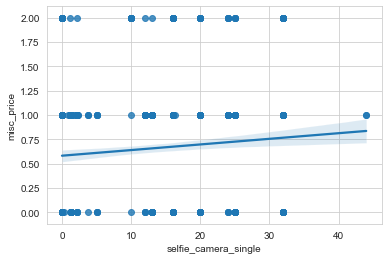

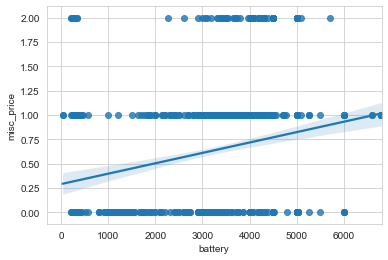

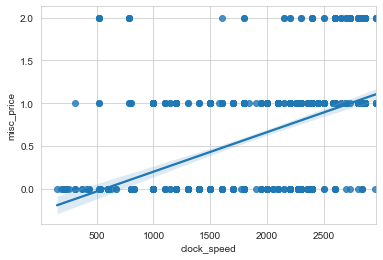

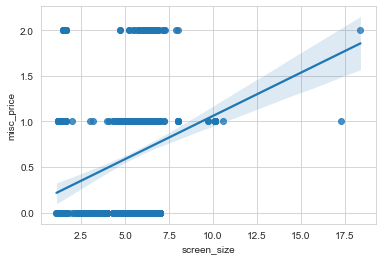

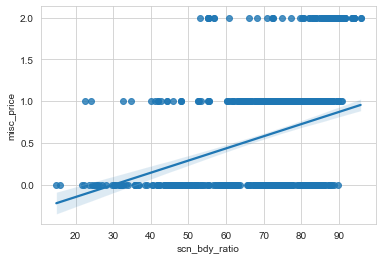

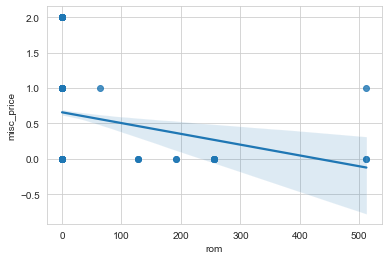

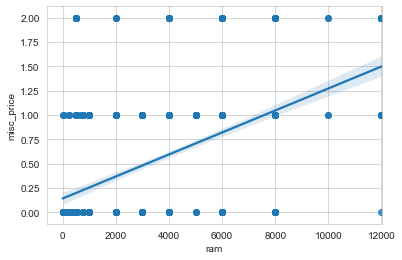

the best result is 


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [13]:
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from data_clean2 import clean_data
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn import preprocessing
from feature_selection import y_classify_five, y_classify
# Load up dataset 1: gsmarena
data = pd.read_csv('dataset/GSMArena_dataset_2020.csv', index_col=0)

data_features = data[["oem", "launch_announced", "launch_status", "body_dimensions", "display_size", "comms_wlan", "comms_usb",
                "features_sensors", "platform_os", "platform_cpu", "platform_gpu", "memory_internal",
                "main_camera_single", "main_camera_video", "misc_price",
                "selfie_camera_video",
                "selfie_camera_single", "battery"]]

# Clean up the data into a trainable form.
df = clean_data(data_features)
print('df = \n',df)
df.dropna(inplace=True)
df.reset_index(drop=True)

y = df["misc_price"]
X = df.drop(["key_index", "misc_price"], axis=1)


# convert to categorical data
lab_enc = preprocessing.LabelEncoder()



print('lab_enc type:',type(lab_enc),'\nlab_enc =\n',lab_enc)
print('X = \n',X)
print(X.iloc[:0])


features = ["oem", "launch_announced",  "body_dimensions", "features_sensors",  "platform_gpu", "main_camera_single", \
            "main_camera_video", "selfie_camera_video","selfie_camera_single", "battery", "clock_speed", \
            "screen_size", "scn_bdy_ratio", "rom", "ram"]

'''
TO DO: Select the one to three attributes that have the most impact. Use Linear_Regression
'''

sns.set_style("whitegrid")
sns.boxplot(x=y) #Box plot
plt.show()

for i in features:
    sns.regplot(x=i,y=y,data=X)
    plt.show()



# y = lab_enc.fit_transform(y)
y = y.apply(y_classify)

# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()



for i in features:
    sns.regplot(x=i,y=y,data=df)
    plt.show()



# Split data into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

'''
TO DO: Select the one to three attributes that have the most impact. Use Linear_Regression
'''


param_grid = {'n_neighbors': np.arange(1,11), 'weights': ['uniform', 'distance'],'algorithm' : ['auto','ball_tree', 'kd_tree','brute']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)
grid_knn.fit(X_train, y_train)

estimator = grid_knn.best_estimator_
y_pred = grid_knn.predict(X_test)
tree_performance = accuracy_score(y_test, y_pred)
print('the best result is ')

# for i in range(1, 11):
#     clf = KNeighborsClassifier(n_neighbors=i, weights='distance')
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     print('\n- - - k = ',i)
#     print(classification_report(y_test, y_pred))
#     print('precise accuracy = ',accuracy_score(y_pred, y_test))

#plot data 

